In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from cabm import post_processing as ppr

In [2]:
# Figure setup
# Set the font to Courier
mpl.rcParams['font.family'] = 'Courier'

# Set the line weight to thin
mpl.rcParams['lines.linewidth'] = 0.75

# Set the color scheme to black and white
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['axes.edgecolor'] = 'black'

In [3]:
agent_df = pd.read_pickle('SIM_OUTPUTS/agent_output_NIL.pkl')

In [4]:
agent_df

Household_Size  Consumption_Rate Brand_Preference Brand_Choice  \
Step AgentID                                                                   
0    0                     2          3.018130                A            A   
     1                     3          3.194530                A            A   
     2                     2          3.262257                B            B   
     3                     3          4.310601                A            A   
     4                     4          4.958419                A            A   
...                      ...               ...              ...          ...   
207  479                   1          3.465384                B            A   
     110                   2          4.087998                A            A   
     868                   1          1.406556                A            A   
     978                   1          3.339412                B            B   
     157                   2          3.070615                A            A   

              Loyalty_Rate                             Purchase_Probabilities  \
Step AgentID                                                                    
0    0            0.980093  {'A': 0.9800934336095558, 'B': 0.0199065663904...   
     1            0.930691  {'A': 0.9306908873654047, 'B': 0.0693091126345...   
     2            0.990807  {'A': 0.009193466715155751, 'B': 0.99080653328...   
     3            0.828104  {'A': 0.8281042699445371, 'B': 0.1718957300554...   
     4            0.841486  {'A': 0.8414859680471432, 'B': 0.1585140319528...   
...                    ...                                                ...   
207  479          0.952099  {'A': 0.047901328609791016, 'B': 0.95209867139...   
     110          0.916200  {'A': 0.9162001878579586, 'B': 0.0837998121420...   
     868          0.845002  {'A': 0.8450024050057079, 'B': 0.1549975949942...   
     978          0.932350  {'A': 0.06764979912834512, 'B': 0.932350200871...   
     157          0.959660  {'A': 0.9596597356428044, 'B': 0.0403402643571...   

              Enable_Ads  Ad_Decay_Factor  \
Step AgentID                                
0    0             False         1.171008   
     1             False         2.682717   
     2             False         2.542340   
     3             False         1.584265   
     4             False         4.499934   
...                  ...              ...   
207  479           False         1.802942   
     110           False         1.381235   
     868           False         1.724186   
     978           False         2.633506   
     157           False         3.497906   

                                          Ad_Channel_Preference  \
Step AgentID                                                      
0    0        {'Web': 0.7066784243699115, 'TV': 0.2933215756...   
     1        {'Web': 0.6772233101524392, 'TV': 0.3227766898...   
     2        {'Web': 0.6797099863005762, 'TV': 0.3202900136...   
     3        {'Web': 0.6465489222809109, 'TV': 0.3534510777...   
     4        {'Web': 0.6482840887772163, 'TV': 0.3517159112...   
...                                                         ...   
207  479      {'Web': 0.5595974708627736, 'TV': 0.4404025291...   
     110      {'Web': 0.8127409615011032, 'TV': 0.1872590384...   
     868      {'Web': 0.6558805195344424, 'TV': 0.3441194804...   
     978      {'Web': 0.5577878595049763, 'TV': 0.4422121404...   
     157      {'Web': 0.780158877534031, 'TV': 0.21984112246...   

                       Adstock  ...  Last_Product_Price  Purchase_Behavior  \
Step AgentID                    ...                                          
0    0        {'A': 0, 'B': 0}  ...                 5.0        buy_minimum   
     1        {'A': 0, 'B': 0}  ...                 5.0        buy_minimum   
     2        {'A': 0, 'B': 0}  ...                 5.0        buy_minimum   
     3        {'A': 0, 'B': 0}  ...                 5.0        buy_mini

In [10]:
def get_agent_data(agent_df, agent_id):
    """
    Filters the agent_df DataFrame for a specific AgentID and collapses the multi-index.

    Parameters:
    agent_df (pd.DataFrame): The DataFrame containing agent data.
    agent_id (int): The AgentID to filter by.

    Returns:
    pd.DataFrame: A DataFrame containing data only for the specified AgentID with 'Step' as the only index.
    """
    filtered_df = agent_df[agent_df.index.get_level_values('AgentID') == agent_id]
    filtered_df = filtered_df.reset_index(level='AgentID', drop=True)
    return filtered_df

In [11]:
# Example usage
agent_id = 0
filtered_df = get_agent_data(agent_df, agent_id)


In [17]:
filtered_df

,Household_Size,Consumption_Rate,Brand_Preference,Brand_Choice,Loyalty_Rate,Purchase_Probabilities,Enable_Ads,Ad_Decay_Factor,Ad_Channel_Preference,Adstock,...,Last_Product_Price,Purchase_Behavior,Step_Min,Step_Max,price_A,tv_A,web_A,price_B,tv_B,web_B
Step,,,,,,,,,,,,,,,,,,,,,
0,2,3.01813,A,A,0.980093,"{'A': 0.9800934336095558, 'B': 0.0199065663904...",False,1.171008,"{'Web': 0.7066784243699115, 'TV': 0.2933215756...","{'A': 0, 'B': 0}",...,5.0,buy_minimum,0,0,5.0,0,0,5.0,0,0
1,2,3.01813,A,A,0.980093,"{'A': 0.9800934336095558, 'B': 0.0199065663904...",False,1.171008,"{'Web': 0.7066784243699115, 'TV': 0.2933215756...","{'A': 0, 'B': 0}",...,5.0,buy_some_or_none,0,0,5.0,0,0,5.0,0,0
2,2,3.01813,A,A,0.980093,"{'A': 0.9800934336095558, 'B': 0.0199065663904...",False,1.171008,"{'Web': 0.7066784243699115, 'TV': 0.2933215756...","{'A': 0, 'B': 0}",...,5.0,buy_some_or_none,0,1,5.0,0,0,5.0,0,0
3,2,3.01813,A,A,0.980093,"{'A': 0.9800934336095558, 'B': 0.0199065663904...",False,1.171008,"{'Web': 0.7066784243699115, 'TV': 0.2933215756...","{'A': 0, 'B': 0}",...,5.0,buy_some_or_none,0,0,5.0,0,0,5.0,0,0
4,2,3.01813,A,A,0.980093,"{'A': 0.9800934336095558, 'B': 0.0199065663904...",False,1.171008,"{'Web': 0.7066784243699115, 'TV': 0.2933215756...","{'A': 0, 'B': 0}",...,5.0,buy_some_or_none,0,1,5.0,7500,0,5.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2,3.01813,A,A,0.980093,"{'A': 0.9800934336095558, 'B': 0.0199065663904...",False,1.171008,"{'Web': 0.7066784243699115, 'TV': 0.2933215756...","{'A': 0, 'B': 0}",...,5.0,buy_some_or_none,0,1,5.0,0,0,5.0,0,0
204,2,3.01813,A,A,0.980093,"{'A': 0.9800934336095558, 'B': 0.0199065663904...",False,1.171008,"{'Web': 0.7066784243699115, 'TV': 0.2933215756...","{'A': 0, 'B': 0}",...,5.0,buy_some_or_none,0,1,5.0,0,0,5.0,0,0
205,2,3.01813,A,A,0.980093,"{'A': 0.9800934336095558, 'B': 0.0199065663904...",False,1.171008,"{'Web': 0.7066784243699115, 'TV': 0.2933215756...","{'A': 0, 'B': 0}",...,5.0,buy_minimum,1,1,5.0,0,0,5.0,0,0


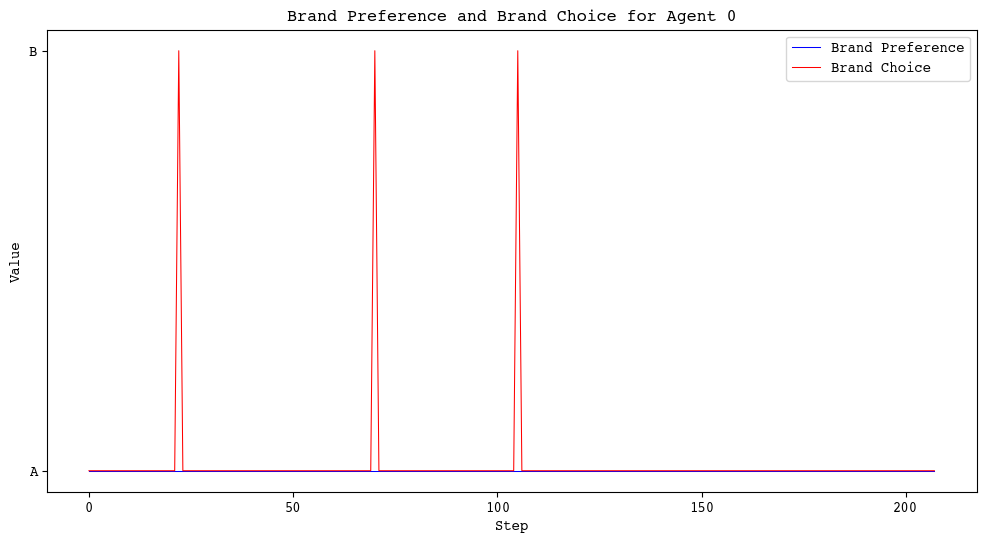

In [18]:
# Function to plot Brand_Preference and Brand_Choice
def plot_brand_data(agent_df, agent_id):
    """
    Plots Brand_Preference and Brand_Choice for a specific AgentID.

    Parameters:
    agent_df (pd.DataFrame): The DataFrame containing agent data.
    agent_id (int): The AgentID to filter by.
    """
    filtered_df = get_agent_data(agent_df, agent_id)
    
    plt.figure(figsize=(12, 6))
    
    # Plot Brand_Preference
    plt.plot(filtered_df.index, filtered_df['Brand_Preference'], label='Brand Preference', color='blue')
    
    # Plot Brand_Choice
    plt.plot(filtered_df.index, filtered_df['Brand_Choice'], label='Brand Choice', color='red')
    
    plt.xlabel('Step')
    plt.ylabel('Value')
    plt.title(f'Brand Preference and Brand Choice for Agent {agent_id}')
    plt.legend()
    plt.show()

# Example usage
agent_id = 0
plot_brand_data(agent_df, agent_id)

In [31]:
def calculate_brand_metrics(agent_df, agent_id):
    """
    Calculates the number of times a brand other than the brand preference is chosen
    and the number of times the brand preference changes for a specific AgentID.

    Parameters:
    agent_df (pd.DataFrame): The DataFrame containing agent data.
    agent_id (int): The AgentID to filter by.

    Returns:
    dict: A dictionary containing the counts of brand choice deviations and brand preference changes.
    """
    filtered_df = get_agent_data(agent_df, agent_id)
    
    # Strip whitespace from Brand_Preference and Brand_Choice
    filtered_df['Brand_Preference'] = filtered_df['Brand_Preference'].str.strip()
    filtered_df['Brand_Choice'] = filtered_df['Brand_Choice'].str.strip()
    
    # Calculate the number of times a brand other than the brand preference is chosen
    brand_choice_deviations = (filtered_df['Brand_Choice'] != filtered_df['Brand_Preference']).sum()
    
    # Calculate the number of times the brand preference changes, excluding the first row
    brand_preference_changes = (filtered_df['Brand_Preference'] != filtered_df['Brand_Preference'].shift()).iloc[1:].sum()
    
    return {
        'brand_choice_deviations': brand_choice_deviations,
        'brand_preference_changes': brand_preference_changes
    }

In [32]:
# Get unique AgentID values
unique_agent_ids = agent_df.index.get_level_values('AgentID').unique()

# Dictionary to store metrics for all agents
all_metrics = {}

# Calculate metrics for each agent
for agent_id in unique_agent_ids:
    all_metrics[agent_id] = calculate_brand_metrics(agent_df, agent_id)

# Print metrics for all agents
for agent_id, metrics in all_metrics.items():
    print(f"Agent {agent_id}: {metrics}")

Agent 0: {'brand_choice_deviations': 3, 'brand_preference_changes': 0}
Agent 1: {'brand_choice_deviations': 6, 'brand_preference_changes': 0}
Agent 2: {'brand_choice_deviations': 1, 'brand_preference_changes': 0}
Agent 3: {'brand_choice_deviations': 39, 'brand_preference_changes': 0}
Agent 4: {'brand_choice_deviations': 35, 'brand_preference_changes': 2}
Agent 5: {'brand_choice_deviations': 26, 'brand_preference_changes': 0}
Agent 6: {'brand_choice_deviations': 24, 'brand_preference_changes': 0}
Agent 7: {'brand_choice_deviations': 13, 'brand_preference_changes': 0}
Agent 8: {'brand_choice_deviations': 17, 'brand_preference_changes': 0}
Agent 9: {'brand_choice_deviations': 12, 'brand_preference_changes': 0}
Agent 10: {'brand_choice_deviations': 4, 'brand_preference_changes': 0}
Agent 11: {'brand_choice_deviations': 51, 'brand_preference_changes': 4}
Agent 12: {'brand_choice_deviations': 10, 'brand_preference_changes': 0}
Agent 13: {'brand_choice_deviations': 40, 'brand_preference_chang